<a href="https://colab.research.google.com/github/Jorge-89/Regresiones_TP_UNSAM/blob/main/Ridge_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importo librerias necesarias
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error as mse
from sklearn.pipeline import Pipeline
from sklearn.preprocessing  import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn import datasets, linear_model
from sklearn.linear_model import Lasso

from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [2]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Regresion-Lineal-/main/base_datos_estaciones_met_V3_train.csv'
df = pd.read_csv(url, sep=",")
df.columns

Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [3]:
x= df[[ 'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 'Humedad_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'Temp_ San Miguel - Las Varillas', 'Humedad_ San Miguel - Las Varillas']]
y= df["Temp_Alicia AgriculturaCba"]


In [4]:
#Separo los datos de "train" en entrenamiento y prueba "test" para probar los algoritmos
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [5]:
modelo= Pipeline([('scaler', StandardScaler()),
                    ('features', PolynomialFeatures()),
                  ('model',Ridge(normalize=True))
])

grilla = GridSearchCV(modelo,
                      {'model__alpha':[0,0.001,0.0001], 'features__degree':[4,5,6]},
                      cv = 5, scoring="neg_mean_squared_error", verbose=3
                      )
grilla.fit(x_train,y_train)






Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] features__degree=4, model__alpha=0 ..............................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] . features__degree=4, model__alpha=0, score=-0.764, total=   1.7s
[CV] features__degree=4, model__alpha=0 ..............................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.7s remaining:    0.0s


[CV] . features__degree=4, model__alpha=0, score=-0.807, total=   0.9s
[CV] features__degree=4, model__alpha=0 ..............................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    2.6s remaining:    0.0s


[CV] . features__degree=4, model__alpha=0, score=-2.165, total=   0.9s
[CV] features__degree=4, model__alpha=0 ..............................
[CV] . features__degree=4, model__alpha=0, score=-0.936, total=   0.8s
[CV] features__degree=4, model__alpha=0 ..............................
[CV] . features__degree=4, model__alpha=0, score=-1.405, total=   0.8s
[CV] features__degree=4, model__alpha=0.001 ..........................
[CV]  features__degree=4, model__alpha=0.001, score=-0.520, total=   0.2s
[CV] features__degree=4, model__alpha=0.001 ..........................
[CV]  features__degree=4, model__alpha=0.001, score=-0.523, total=   0.2s
[CV] features__degree=4, model__alpha=0.001 ..........................
[CV]  features__degree=4, model__alpha=0.001, score=-0.502, total=   0.2s
[CV] features__degree=4, model__alpha=0.001 ..........................
[CV]  features__degree=4, model__alpha=0.001, score=-0.549, total=   0.2s
[CV] features__degree=4, model__alpha=0.001 .....................

[Parallel(n_jobs=1)]: Done  45 out of  45 | elapsed:  4.0min finished


GridSearchCV(cv=5, error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('scaler',
                                        StandardScaler(copy=True,
                                                       with_mean=True,
                                                       with_std=True)),
                                       ('features',
                                        PolynomialFeatures(degree=2,
                                                           include_bias=True,
                                                           interaction_only=False,
                                                           order='C')),
                                       ('model',
                                        Ridge(alpha=1.0, copy_X=True,
                                              fit_intercept=True, max_iter=None,
                                              normalize=True, random_state=None,
                         

In [6]:
grilla.best_params_

{'features__degree': 5, 'model__alpha': 0.0001}

4 1.2154670870125013
4 0.5300303594819729
4 0.500309685380674
5 7.529191330817487
5 0.516872996971933
5 0.49572066228597594
6 9891.004547687868
6 0.5130786379215919
6 0.49824792270050633


Text(0, 0.5, 'RMSE en validacion')

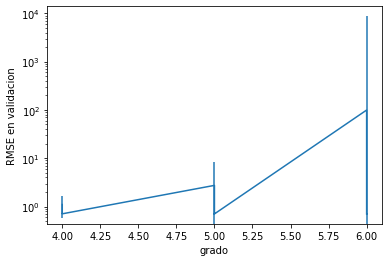

In [7]:
for ni, i in enumerate(grilla.cv_results_['params']):
  print(i['features__degree'],-grilla.cv_results_['mean_test_score'][ni])
plt.errorbar(grilla.cv_results_['param_features__degree'].data,np.sqrt(-grilla.cv_results_['mean_test_score']),yerr=grilla.cv_results_['std_test_score'])
plt.yscale('log')
plt.xlabel('grado')
plt.ylabel('RMSE en validacion')



In [8]:
grilla.cv_results_['mean_test_score']

array([-1.21546709e+00, -5.30030359e-01, -5.00309685e-01, -7.52919133e+00,
       -5.16872997e-01, -4.95720662e-01, -9.89100455e+03, -5.13078638e-01,
       -4.98247923e-01])

In [9]:
grilla.best_score_

-0.49572066228597594

In [10]:
"""
modelo=Pipeline([['poly',PolynomialFeatures(degree=3,include_bias=True)],['regressor',Ridge(fit_intercept=True,alpha=0.01)]])
#entreno el modelo de grado 3 con los datos de entrenamiento, ya que fue el mejor grado encontrado 
modelo.fit(x_train,y_train)
"""
#no usar esto

"\nmodelo=Pipeline([['poly',PolynomialFeatures(degree=3,include_bias=True)],['regressor',Ridge(fit_intercept=True,alpha=0.01)]])\n#entreno el modelo de grado 3 con los datos de entrenamiento, ya que fue el mejor grado encontrado \nmodelo.fit(x_train,y_train)\n"

In [11]:
# Fit best model
modelo=grilla.best_estimator_
modelo.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('scaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('features',
                 PolynomialFeatures(degree=5, include_bias=True,
                                    interaction_only=False, order='C')),
                ('model',
                 Ridge(alpha=0.0001, copy_X=True, fit_intercept=True,
                       max_iter=None, normalize=True, random_state=None,
                       solver='auto', tol=0.001))],
         verbose=False)

In [12]:
print(modelo['model'].coef_)
print(modelo['model'].intercept_)

[ 0.          2.38376165  0.48135157 ... -0.01700206  0.02186631
  0.00345287]
22.301966946458947


In [13]:
y_pred_test = modelo.predict(x_test)
y_pred_test

array([24.45132204, 27.09040995, 14.8529486 , ..., 33.58316766,
       27.48073172, 28.86375391])

In [14]:
y_test

1803     24.9
321      27.0
7317     14.7
8065     20.8
10056    14.1
         ... 
5684     16.6
8437     19.1
1897     34.2
5719     26.9
9508     28.6
Name: Temp_Alicia AgriculturaCba, Length: 2074, dtype: float64

In [15]:
print('Precisión del modelo usando la raíz del error cuadratico medio (RMSE):')
score_testeo = mean_squared_error(y_test,y_pred_test,squared=True)

print (score_testeo)


Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.47891799621480385


In [18]:
#se puede usar scoring='neg_root_mean_squared_error' tambien que seria la raiz
MSE_modelo=cross_val_score(modelo,x_train,y_train,cv=5,scoring='neg_mean_squared_error')
errores = -MSE_modelo
MSE_modelo


array([-0.4989587 , -0.46873611, -0.52835585, -0.4849271 , -0.49762555])

In [19]:
print(errores.mean(), errores.std())

0.49572066228597594 0.019615482426395985


Ahora se prueba con un set de datos final de la materia

In [20]:
#se importa el set de datos
url = 'https://raw.githubusercontent.com/Jorge-89/Regresiones_TP_UNSAM/main/base_datos_estaciones_met_V3_test.csv'
df = pd.read_csv(url, sep=",")
df.columns

Index(['Unnamed: 0', 'fecha_completa', 'Fecha', 'Hora',
       'Temp_Alicia AgriculturaCba', 'Humedad_Alicia AgriculturaCba',
       'PP_Alicia AgriculturaCba', 'Temp_Las Varas AgriculturaCba',
       'Humedad_Las Varas AgriculturaCba', 'PP_Las Varas AgriculturaCba',
       'Temp_San Miguel - Establecimiento Don Luis',
       'Humedad_San Miguel - Establecimiento Don Luis',
       'PP_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'PP_San Miguel - Listello', 'Temp_ San Miguel - Las Varillas',
       'Humedad_ San Miguel - Las Varillas', 'PP_ San Miguel - Las Varillas'],
      dtype='object')

In [21]:
x= df[[ 'Temp_Las Varas AgriculturaCba', 'Humedad_Las Varas AgriculturaCba',
        'Temp_San Miguel - Establecimiento Don Luis', 'Humedad_San Miguel - Establecimiento Don Luis',
       'Temp_San Miguel - Listello', 'Humedad_San Miguel - Listello',
       'Temp_ San Miguel - Las Varillas', 'Humedad_ San Miguel - Las Varillas']]
y= df["Temp_Alicia AgriculturaCba"]

In [22]:
y_pred = modelo.predict(x)
y_pred

array([19.83084136, 19.78317425, 19.55378963, ..., 14.3350968 ,
       14.29957471, 14.29387995])

In [23]:
y

0       19.7
1       19.4
2       19.1
3       18.9
4       18.8
        ... 
2587    14.4
2588    14.2
2589    14.1
2590    14.0
2591    13.9
Name: Temp_Alicia AgriculturaCba, Length: 2592, dtype: float64

In [26]:
print('Precisión del modelo usando el MSE):')
score_testeo = mean_squared_error(y_pred,y,squared=True)

print (score_testeo)


Precisión del modelo usando la raíz del error cuadratico medio (RMSE):
0.4005408042158964
